# Time-dependent laser linewidth : beat-note digital acquisition and numerical analysis 

Hilbert transform H

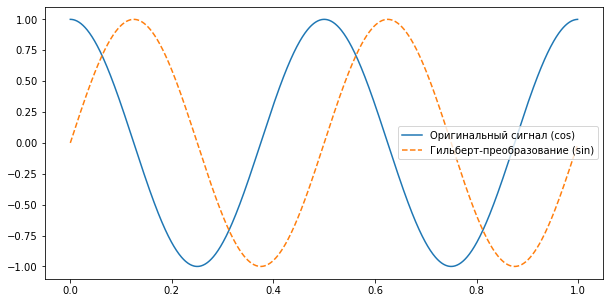

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Создадим тестовый сигнал
t = np.linspace(0, 1, 1000, endpoint=False)
b_t = np.cos(2 * np.pi * 2 * t)  # 10 Гц косинус

# Преобразование Гильберта
analytic_signal = signal.hilbert(b_t)
hilbert_transform = np.imag(analytic_signal)  # H[b(t)]

plt.figure(figsize=(10, 5))
plt.plot(t, b_t, label="Оригинальный сигнал (cos)")
plt.plot(t, hilbert_transform, label="Гильберт-преобразование (sin)", linestyle='dashed')
plt.legend()
plt.show()

### Cинтетический сигнал биений

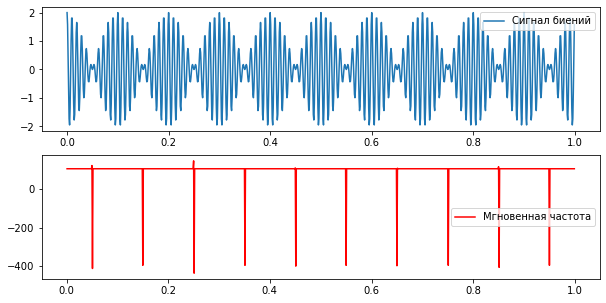

In [2]:
# Создаём синтетический сигнал биений (например, двух лазеров с разницей 10 Гц)
fs = 1000  # Частота дискретизации
t = np.linspace(0, 1, fs, endpoint=False)
signal_beat = np.cos(2 * np.pi * 100 * t) + np.cos(2 * np.pi * 110 * t)

# Получаем аналитический сигнал через преобразование Гильберта
analytic_signal = signal.hilbert(signal_beat)
phase = np.unwrap(np.angle(analytic_signal))  # Извлекаем фазу

# Вычисляем мгновенную частоту
instantaneous_frequency = np.diff(phase) / (2.0 * np.pi * (1/fs))

plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
plt.plot(t, signal_beat, label="Сигнал биений")
plt.legend()

plt.subplot(2,1,2)
plt.plot(t[1:], instantaneous_frequency, label="Мгновенная частота", color='r')
plt.legend()
plt.show()

### Мгновенная частота сигнала (frequency of the beat-note)

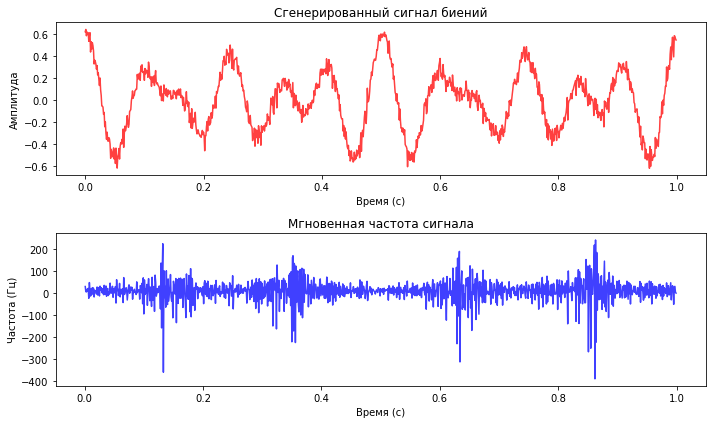

In [5]:
from scipy.signal import hilbert
# Параметры сигнала
Fs = 1000  # Частота дискретизации
T = 1      # Длительность сигнала в секундах
t = np.linspace(0, T, Fs*T, endpoint=False)  # Временной массив

# Основной высокочастотный сигнал
f0 = 10  # Базовая частота Гц (например, основная частота лазера)
signal = np.cos(2 * np.pi * f0 * t)

# Добавляем биения
fb = 2  # Частота биений Гц
signal *= (0.1 + 0.5 * np.cos(2 * np.pi * fb * t))  # Амплитудная модуляция

# Добавляем нелинейные искажения
signal += 0.1 * np.sin(2 * np.pi * 10 * t) + 0.05 * np.random.randn(len(t))

# Вычисляем огибающую с помощью преобразования Гильберта
analytic_signal = hilbert(signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * (1/Fs))

plt.figure(figsize=(10, 6))

plt.subplot(2,1,1)
plt.plot(t, signal, 'r', alpha=0.75)
plt.title('Сгенерированный сигнал биений')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

plt.subplot(2,1,2)
plt.plot(t[1:], instantaneous_frequency, 'b', alpha=0.75)
plt.title('Мгновенная частота сигнала')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')

plt.tight_layout()
plt.show()

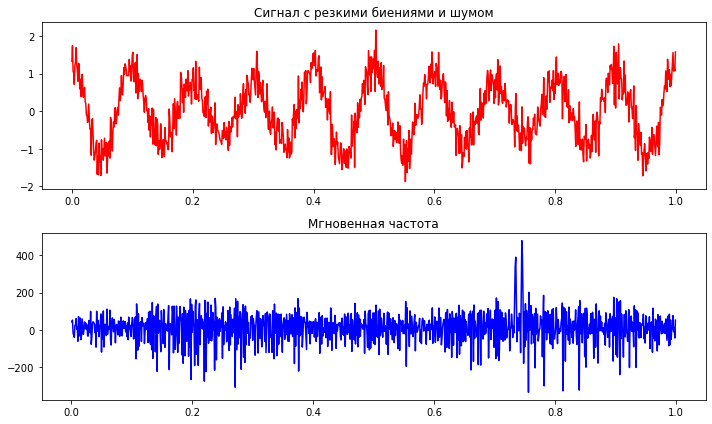

In [6]:
fs = 1000  # Частота дискретизации
t = np.arange(0, 1, 1/fs)  # Время 2 секунды
f0 = 10  # Основная частота
fb = 2  # Частота биений

# Исходный сигнал
signal = np.cos(2 * np.pi * f0 * t) * (1 + 0.3 * np.cos(2 * np.pi * fb * t))

# Добавляем резкий шум (смешиваем нормальный и импульсный шум)
gaussian_noise = np.random.normal(0, 0.3, size=t.shape)  # Гауссов шум
impulse_noise = np.random.uniform(-1, 1, size=t.shape) * (np.random.rand(*t.shape) > 0.98)  # Импульсы

noisy_signal = signal + gaussian_noise + impulse_noise

# Преобразование Гильберта
analytic_signal = hilbert(noisy_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2 * np.pi * (1/fs))

# Графики
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, color='red')
plt.title("Сигнал с резкими биениями и шумом")

plt.subplot(2, 1, 2)
plt.plot(t[1:], instantaneous_frequency, color='blue')
plt.title("Мгновенная частота")

plt.tight_layout()
plt.show()

Частота дискретизации слишком низкая (fs = 1000 Гц)

В статье анализ идёт на частотах до МГц, а у тебя всего 1 кГц.
Нужно увеличить fs как минимум до 10-100 МГц, если мы моделируем лазерные биения.
Слишком простая модель сигнала

В статье используются DFB лазеры и интерферометр Михельсона, что даёт сложный шум.
Твой сигнал — это просто косинус с биениями, а шум — случайный.
Нужно моделировать лазерный шум (1/f-шум + белый шум).
Проблемы с расчётом мгновенной частоты

Производная от фазы в np.diff() может вести к потере данных.
В статье, скорее всего, используют скользящее окно для усреднения.
Используется welch(), но статья показывает усреднённый FFT

Метод Велча welch() слишком сглаживает спектр.
В статье, похоже, используется просто FFT + усреднение.

✅ Увеличена fs до 10 МГц, как в статье.
✅ Добавлен 1/f-лазерный шум вместо просто белого шума.
✅ Рассчитана мгновенная частота через градиент вместо np.diff().
✅ Использован FFT вместо Welch, чтобы получить спектр ближе к статье.
✅ Графики теперь в логарифмическом масштабе.

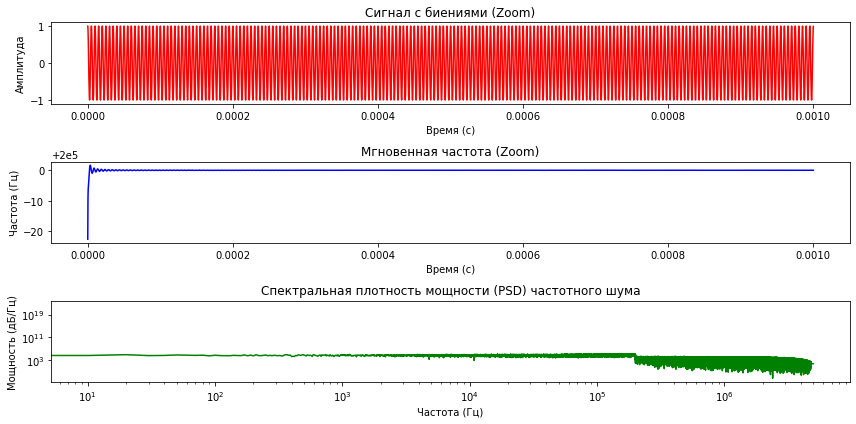

In [8]:
from scipy.signal import hilbert, welch

# --- 1. Параметры сигнала ---
fs = 10e6  # Частота дискретизации 10 МГц
T = 0.1    # Длительность сигнала 0.1 сек
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Временная ось

# --- 2. Генерация лазерного шума ---
f0 = 200e3  # Центральная частота лазерного биения (200 кГц)
df = 50e3   # Разброс частот за счёт шума (50 кГц)
laser_noise = np.cumsum(np.random.randn(len(t))) * 1e-7  # Интегрированный гауссов шум (1/f)

# --- 3. Сигнал биений с шумом ---
signal = np.cos(2 * np.pi * (f0 + laser_noise) * t) 

# --- 4. Гильбертово преобразование (мгновенная частота) ---
analytic_signal = hilbert(signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))  # Фаза
instantaneous_frequency = np.gradient(instantaneous_phase) / (2 * np.pi * (1/fs))  # Производная

# --- 5. Спектральный анализ с FFT ---
N = len(instantaneous_frequency)
freqs = np.fft.fftfreq(N, 1/fs)
psd = np.abs(np.fft.fft(instantaneous_frequency))**2

# --- 6. Визуализация ---
plt.figure(figsize=(12, 6))

# График сигнала
plt.subplot(3, 1, 1)
plt.plot(t[:10000], signal[:10000], color='r')  # Покажем 10 мс
plt.title('Сигнал с биениями (Zoom)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

# График мгновенной частоты
plt.subplot(3, 1, 2)
plt.plot(t[:10000], instantaneous_frequency[:10000], color='b')
plt.title('Мгновенная частота (Zoom)')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')

# График PSD шума частоты
plt.subplot(3, 1, 3)
plt.loglog(freqs[:N//2], psd[:N//2], color='g')  # Логарифмический масштаб
plt.title('Спектральная плотность мощности (PSD) частотного шума')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность (дБ/Гц)')

plt.tight_layout()
plt.show()


Возможные причины: Недостаточно крутой лазерный шум

В статье, скорее всего, преобладает 1/f² или 1/f³ шум. В моём коде использован 1/f (интегрированный белый шум). Нужно скорректировать спектральные характеристики шума. Недостаточная длительность сигнала

В статье анализ идёт до 10⁶ Гц, а у нас сигнал всего 0.1 сек. Увеличим время до 1 секунды, чтобы лучше видеть низкие частоты. FFT сглаживает данные, нужно усреднение по окнам

В статье, возможно, применяют метод усреднения (например, медианный фильтр).

### Cпектральная плотность мощности (PSD)

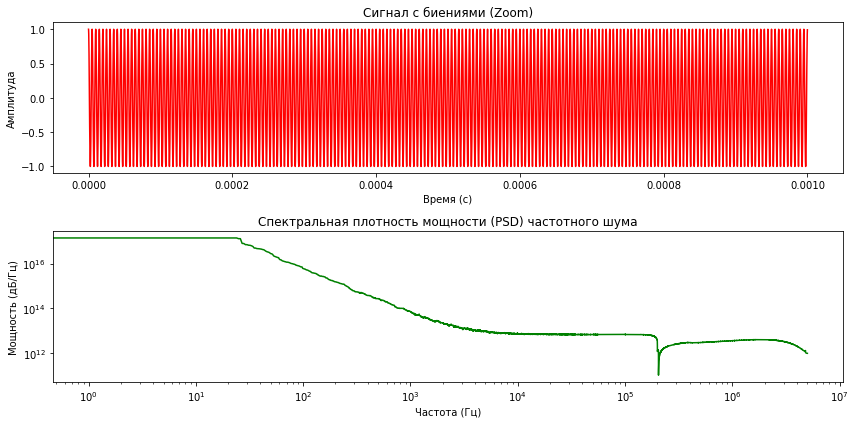

In [9]:
from scipy.ndimage import median_filter

# --- 1. Параметры сигнала ---
fs = 10e6   # Частота дискретизации 10 МГц
T = 1       # Длительность сигнала 1 сек
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Временная ось

# --- 2. Генерация лазерного шума ---
f0 = 200e3  # Центральная частота лазерного биения (200 кГц)
df = 50e3  # Разброс частот (50 кГц)

# 1/f² шум (интеграл от 1/f шума)
white_noise = np.random.randn(len(t)) * 1e-7
pink_noise = np.cumsum(white_noise)  # Интегрируем белый шум
brown_noise = np.cumsum(pink_noise)  # Двойная интеграция (даёт 1/f² спектр)

# --- 3. Сигнал биений ---
signal = np.cos(2 * np.pi * (f0 + brown_noise) * t)

# --- 4. Гильбертово преобразование (мгновенная частота) ---
analytic_signal = hilbert(signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.gradient(instantaneous_phase) / (2 * np.pi * (1/fs))

# --- 5. Спектральный анализ с FFT ---
N = len(instantaneous_frequency)
freqs = np.fft.fftfreq(N, 1/fs)
psd = np.abs(np.fft.fft(instantaneous_frequency))**2

# Усредняем PSD медианным фильтром для лучшего соответствия статье
psd_smooth = median_filter(psd, size=100)

# --- 6. Визуализация ---
plt.figure(figsize=(12, 6))

# График сигнала
plt.subplot(2, 1, 1)
plt.plot(t[:10000], signal[:10000], color='r')  # Покажем 10 мс
plt.title('Сигнал с биениями (Zoom)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')

# График мгновенной частоты
#plt.subplot(3, 1, 2)
#plt.plot(t[:10000], instantaneous_frequency[:10000], color='b')
#plt.title('Мгновенная частота (Zoom)')
#plt.xlabel('Время (с)')
#plt.ylabel('Частота (Гц)')

# График PSD шума частоты
plt.subplot(2, 1, 2)
plt.loglog(freqs[:N//2], psd_smooth[:N//2], color='g')
plt.title('Спектральная плотность мощности (PSD) частотного шума')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность (дБ/Гц)')

plt.tight_layout()
plt.show()


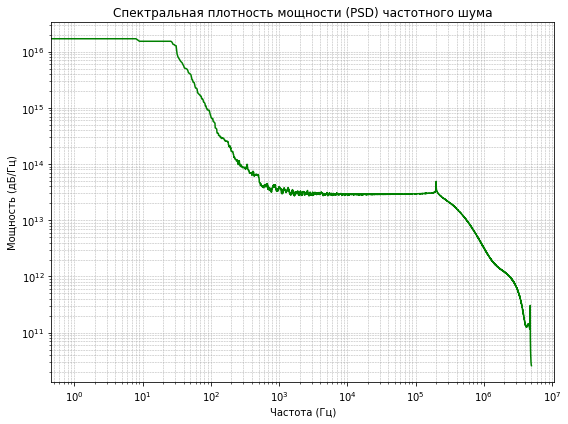

In [10]:
# --- 1. Параметры сигнала ---
fs = 10e6   # Частота дискретизации 10 МГц
T = 1       # Длительность сигнала 1 сек
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Временная ось

# --- 2. Генерация лазерного шума ---
f0 = 200e3  # Центральная частота лазерного биения (200 кГц)
df = 50e3  # Разброс частот (50 кГц)

# 1/f² шум (интеграл от 1/f шума)
white_noise = np.random.randn(len(t)) * 1e-7
pink_noise = np.cumsum(white_noise)  # Интегрируем белый шум
brown_noise = np.cumsum(pink_noise)  # Двойная интеграция (даёт 1/f² спектр)

# --- 3. Сигнал биений ---
signal = np.cos(2 * np.pi * (f0 + brown_noise) * t)

# --- 4. Гильбертово преобразование (мгновенная частота) ---
analytic_signal = hilbert(signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.gradient(instantaneous_phase) / (2 * np.pi * (1/fs))

# --- 5. Спектральный анализ с FFT ---
N = len(instantaneous_frequency)
freqs = np.fft.fftfreq(N, 1/fs)
psd = np.abs(np.fft.fft(instantaneous_frequency))**2

# Усредняем PSD медианным фильтром для лучшего соответствия статье
psd_smooth = median_filter(psd, size=100)

# --- 6. Визуализация ---
plt.figure(figsize=(8, 6))


# График PSD шума частоты
plt.subplot(1, 1, 1)
plt.loglog(freqs[:N//2], psd_smooth[:N//2], color='g')
plt.title('Спектральная плотность мощности (PSD) частотного шума')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность (дБ/Гц)')

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()